In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
## We will use machine learning via Sklean to perform linear regression analysis.
## First, we'll import our cleaned data that has been split and joined for this project.
austin = 'https://raw.githubusercontent.com/dianahandler/Final_Module20_Group3/main/Data_Clearning_nochangecity/autinHousingData_cleaned_nochangecity.csv'
df = pd.read_csv(austin)

In [3]:
df.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,zip_rank,median_zip,pr_sqft
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,1,...,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...,8,289500.0,117.0
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,1,...,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...,8,289500.0,167.0
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,1,...,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...,8,289500.0,173.0
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,1,...,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...,8,289500.0,143.0
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,1,...,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg,8,289500.0,113.0


## Pearson correlation coefficient analysis

As the above dataframes show, there are more than 40 features to consider in predicting property prices. With correlation analysis, as mentioned in 15.7.1 (2021), we can generate Pearson correlation coefficients to better determine numerically how each feature is related to those prices. To do this with dataframe columns, we will need corr(), which happens to generate Pearson correlation coefficients by default ('pandas.DataFrame.corr', 2021).

Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

We should also note that this correlation analysis has been conducted elsewhere in the group repository, but only as a demonstration. We will be recreating this process here since it is key for our later regression analysis.

Source: https://github.com/dianahandler/Final_Module20_Group3/commit/7c2f33ca7364dfbb40c21b7be7651fa2b5ad51de?branch=7c2f33ca7364dfbb40c21b7be7651fa2b5ad51de#diff-1c8bade9d6a619027f877dbf242cf157c76dbcd45194479d71bc5e565ffa1a09

In [4]:
## Let's look at the column names for future reference.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12933 entries, 0 to 12932
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   zpid                      12933 non-null  int64  
 1   city                      12933 non-null  object 
 2   streetAddress             12933 non-null  object 
 3   zipcode                   12933 non-null  int64  
 4   description               12933 non-null  object 
 5   latitude                  12933 non-null  float64
 6   longitude                 12933 non-null  float64
 7   propertyTaxRate           12933 non-null  float64
 8   garageSpaces              12933 non-null  int64  
 9   hasAssociation            12933 non-null  int64  
 10  hasCooling                12933 non-null  int64  
 11  hasGarage                 12933 non-null  int64  
 12  hasHeating                12933 non-null  int64  
 13  hasSpa                    12933 non-null  int64  
 14  hasVie

In [5]:
df['latestPriceSource'].head(10)

0    Coldwell Banker United, Realtors - South Austin
1                                     Agent Provided
2                                     Agent Provided
3                                     Agent Provided
4                                     Agent Provided
5                                    Broker Provided
6                                    Broker Provided
7                                     Agent Provided
8                                     Agent Provided
9                                     Agent Provided
Name: latestPriceSource, dtype: object

While most of the data is numerical, we do find 7 columns of non-numerical data: city, streetAddress, description, hometype, latest saledate, latestPriceSource, and homeImage. 

We will certainly convert city names and hometypes, since we want to know the impact of home type or city location on price values. 

Price source also might be a factor, considering that perhaps more established and reputable price providers may charge slightly more than other providers. 

While the looks of a house may influence pricing (i.e. how subjectively good it looks), we definitely feel that home image url's aren't good indicators of price to a machine, unless our machine can read those url's and judge the quality of thousands of homes based on their respective images. Especially with the scope of our project, where we feed numerical data into a machine learning model to arrive at some output.

While we don't have a solid reason to consider latest sale date, street address, and house description as a factors for pricing, we don't have any reason to reject them either.

In [6]:
## From 17.6.2 (2021), we can use sklearn's LabelEncoder to convert strings into numbered data for our
## machine learning model to interpret easier.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
## We'll store our encoded results in a new dataframe 'df1'
## We'll have to drop 3 features – 'zip_rank', 'median_zip', and 'pr_sqft' – since they are
## only used during data cleaning to identify outliers in the raw dataset.
df1 = df.drop(columns=['zip_rank', 'median_zip', 'pr_sqft'])
## We'll encode now.
df1['city'] = le.fit_transform(df1['city'])
df1['streetAddress'] = le.fit_transform(df1['streetAddress'])
df1['homeType'] = le.fit_transform(df1['homeType'])
df1['latestPriceSource'] = le.fit_transform(df1['latestPriceSource'])
df1['description'] = le.fit_transform(df1['description'])
## We want to account for all factors in our correlation analysis, so we'll encode the below features as well.
df1['latest_saledate'] = le.fit_transform(df1['latest_saledate'])
df1['homeImage'] = le.fit_transform(df1['homeImage'])

In [7]:
df1.dtypes

zpid                          int64
city                          int64
streetAddress                 int64
zipcode                       int64
description                   int64
latitude                    float64
longitude                   float64
propertyTaxRate             float64
garageSpaces                  int64
hasAssociation                int64
hasCooling                    int64
hasGarage                     int64
hasHeating                    int64
hasSpa                        int64
hasView                       int64
homeType                      int64
parkingSpaces                 int64
yearBuilt                     int64
latestPrice                 float64
numPriceChanges               int64
latest_saledate               int64
latest_salemonth              int64
latest_saleyear               int64
latestPriceSource             int64
numOfPhotos                   int64
accessibility                 int64
numOfAppliances               int64
numOfParkingFeatures        

In [8]:
## Previously, we used "corr" to get unformatted correlation data. While we were able to 
## get by with "corr", we'll need to use "corr()" to format this data as a dataframe.
results = df1.corr()
results.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
zpid,1.000000,0.031987,-0.007970,-0.047785,0.002812,-0.057032,0.008735,-0.013535,0.008074,0.112186,...,-0.002677,0.017950,0.048431,-0.048822,-0.032713,-0.072430,0.070631,-0.053663,0.010098,-0.241262
city,0.031987,1.000000,-0.066672,-0.387435,0.006964,0.017842,0.124554,-0.022453,-0.011973,0.073825,...,-0.008321,0.002411,-0.047628,-0.100335,0.019242,-0.058607,-0.012081,0.007664,-0.005043,-0.022847
streetAddress,-0.007970,-0.066672,1.000000,0.132653,0.056677,-0.156198,-0.057933,-0.058630,0.004207,-0.063764,...,-0.044856,0.004896,-0.002731,-0.053974,0.010220,0.045684,-0.049928,-0.039676,-0.031843,-0.013766
zipcode,-0.047785,-0.387435,0.132653,1.000000,0.007363,-0.053205,-0.148400,-0.184476,-0.020048,-0.006011,...,-0.011529,0.057596,0.056335,0.052045,0.132142,0.109812,-0.056338,0.035178,-0.053862,0.076175
description,0.002812,0.006964,0.056677,0.007363,1.000000,0.003913,0.008414,-0.014119,0.076419,-0.006297,...,-0.002878,0.023735,-0.008954,0.002081,0.019179,0.000146,0.009101,0.002624,0.018009,-0.009954


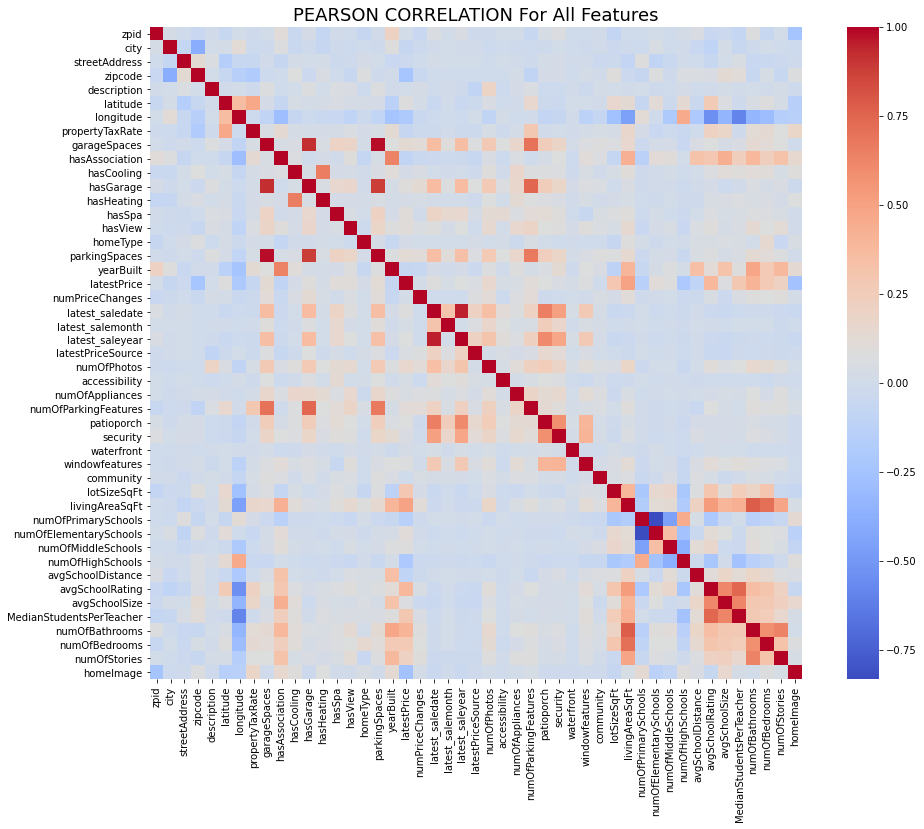

In [9]:
## Sam: With all our features encoded into numbers, we can visualize the correlation matrix, as Cynthia has
## done below.
## Import seaborn for heatmap.
import seaborn as sns

## Create a heat map for latest Price correlations to other features only.
## Sam: Since we already stored "df1.corr()" into the "results" variable, we'll edit "df1.corr" to "results".
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(results, cmap="coolwarm", square=True)

## Create title.
plt.title('PEARSON CORRELATION For All Features', fontsize=18)
# To save the below plot, uncomment the below code.
# plt.savefig('CorrAll')
plt.show()

## Features for Multiple Linear Regression 
In multiple linear regrssion, as noted by statology (2020), each independent variable used in the model should not be strongly correlated with another variable.

While this correlation heatmap helps us visually judge each feature's correlation to other features, we will ultimately need to check each feature's for signs of collinearity. Not to mention that judging all 40+ features just by their correlative colors will be a tedious process.

Fortunately, we can check collinearity by finding each feature's **variance influence score
or VIF**, with the help of the patsy and statsmodels libraries (2020, 'How to Calculate VIF 
in Python').

https://www.statology.org/how-to-calculate-vif-in-python/

In [10]:
## Round 1
## By refactoring VIF code from statology (2020), we'll finally be able to gauge collinearity
## among our independent variables ('How to Calculate VIF in Python').
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y_1, X_1 = dmatrices('latestPrice ~ zpid+city+streetAddress+zipcode+description+latitude+longitude+propertyTaxRate+garageSpaces+hasAssociation+hasCooling+hasGarage+hasHeating+hasSpa+hasView+homeType+parkingSpaces+yearBuilt+numPriceChanges+latest_saledate+latest_salemonth+latest_saleyear+latestPriceSource+numOfPhotos+accessibility+numOfAppliances+numOfParkingFeatures+patioporch+security+waterfront+windowfeatures+community+lotSizeSqFt+livingAreaSqFt+numOfPrimarySchools+numOfElementarySchools+numOfMiddleSchools+numOfHighSchools+avgSchoolDistance+avgSchoolRating+avgSchoolSize+MedianStudentsPerTeacher+numOfBathrooms+numOfBedrooms+numOfStories+homeImage', data=df1, return_type='dataframe')
## Notice that we separated our output 'latestPrice' from the remaining 40+ features.
## We also make sure to set 'df1', our working dataframe, as our main source for 
## VIF calculation.
vif1 = pd.DataFrame()
vif1['VIF'] = [variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif1['variable'] = X_1.columns
## Time to sort the VIF values in ascending order.
vif1.sort_values(by=['VIF'])

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF,variable
0,0.000000,Intercept
30,1.006821,waterfront
25,1.037905,accessibility
32,1.041150,community
5,1.072036,description
23,1.074999,latestPriceSource
3,1.079188,streetAddress
19,1.085391,numPriceChanges
15,1.102168,hasView
16,1.117593,homeType


## VIF Feature Selection
We notice that there are 6 features with **VIF values greater than 10**, most notably 'latest_saleyear' and 'latest_salesdate'. **This indicates that we have highly correlated features in our 'df1' dataset**, as Wu (2020) brings up in his article ('Multicollinearity in Regression'). To resolve this, we'll opt to remove the highest correlated features from the dataset and reevaluate our VIF values (Wu, 2020, 'Multicollinearity in Regression').

In [11]:
## Round 2
df2 = df1.drop(columns=['latest_saleyear', 'latest_saledate'])
## We'll remove latest_saleyear and latest_saledate from the features for VF1 calculation.
y_2, X_2 = dmatrices('latestPrice ~ zpid+city+streetAddress+zipcode+description+latitude+longitude+propertyTaxRate+garageSpaces+hasAssociation+hasCooling+hasGarage+hasHeating+hasSpa+hasView+homeType+parkingSpaces+yearBuilt+numPriceChanges+latest_salemonth+latestPriceSource+numOfPhotos+accessibility+numOfAppliances+numOfParkingFeatures+patioporch+security+waterfront+windowfeatures+community+lotSizeSqFt+livingAreaSqFt+numOfPrimarySchools+numOfElementarySchools+numOfMiddleSchools+numOfHighSchools+avgSchoolDistance+avgSchoolRating+avgSchoolSize+MedianStudentsPerTeacher+numOfBathrooms+numOfBedrooms+numOfStories+homeImage', data=df2, return_type='dataframe')
vif2 = pd.DataFrame()
vif2['VIF'] = [variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])]
vif2['variable'] = X_2.columns
vif2.sort_values(by=['VIF'])

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF,variable
0,0.000000,Intercept
28,1.006649,waterfront
23,1.035606,accessibility
30,1.041065,community
21,1.052978,latestPriceSource
5,1.068857,description
3,1.079143,streetAddress
19,1.081601,numPriceChanges
15,1.101702,hasView
20,1.110584,latest_salemonth


Looking at the top 3 features by VIF score, we see slight decreases – from ~51.26 to ~51.24, ~32.07 to ~32.06, and ~10.545 to ~10.48. Nevertheless, all 3 are still have VIF scores of over 10, meaning they're highly correlated features that we should leave out of our multilinear regression model.

In [12]:
## Round 3
df3 = df2.drop(columns=['hasGarage', 'parkingSpaces', 'garageSpaces'])
## We'll remove hasGarage, parkingSpaces, and garageSpaces from the features for VF1 calculation.
y_3, X_3 = dmatrices('latestPrice ~ zpid+city+streetAddress+zipcode+description+latitude+longitude+propertyTaxRate+hasAssociation+hasCooling+hasHeating+hasSpa+hasView+homeType+yearBuilt+numPriceChanges+latest_salemonth+latestPriceSource+numOfPhotos+accessibility+numOfAppliances+numOfParkingFeatures+patioporch+security+waterfront+windowfeatures+community+lotSizeSqFt+livingAreaSqFt+numOfPrimarySchools+numOfElementarySchools+numOfMiddleSchools+numOfHighSchools+avgSchoolDistance+avgSchoolRating+avgSchoolSize+MedianStudentsPerTeacher+numOfBathrooms+numOfBedrooms+numOfStories+homeImage', data=df3, return_type='dataframe')
vif_3 = pd.DataFrame()
vif_3['VIF'] = [variance_inflation_factor(X_3.values, i) for i in range(X_3.shape[1])]
vif_3['variable'] = X_3.columns
vif_3.sort_values(by=['VIF'])

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF,variable
0,0.000000,Intercept
25,1.006353,waterfront
20,1.034127,accessibility
27,1.038741,community
18,1.052443,latestPriceSource
5,1.067487,description
16,1.077263,numPriceChanges
3,1.078560,streetAddress
12,1.099433,hasSpa
13,1.099816,hasView


## Final Set of Features
Finally, we have a set of features with VIF scores of less than 10. We'll fetch the feature names from this final dataframe (df3) and use it in our linear regression model.

In [13]:
final = df3.columns.tolist()
final.remove('latestPrice')
final

['zpid',
 'city',
 'streetAddress',
 'zipcode',
 'description',
 'latitude',
 'longitude',
 'propertyTaxRate',
 'hasAssociation',
 'hasCooling',
 'hasHeating',
 'hasSpa',
 'hasView',
 'homeType',
 'yearBuilt',
 'numPriceChanges',
 'latest_salemonth',
 'latestPriceSource',
 'numOfPhotos',
 'accessibility',
 'numOfAppliances',
 'numOfParkingFeatures',
 'patioporch',
 'security',
 'waterfront',
 'windowfeatures',
 'community',
 'lotSizeSqFt',
 'livingAreaSqFt',
 'numOfPrimarySchools',
 'numOfElementarySchools',
 'numOfMiddleSchools',
 'numOfHighSchools',
 'avgSchoolDistance',
 'avgSchoolRating',
 'avgSchoolSize',
 'MedianStudentsPerTeacher',
 'numOfBathrooms',
 'numOfBedrooms',
 'numOfStories',
 'homeImage']

<AxesSubplot:title={'center':'(1st) PEARSON CORRELATION For Final Features'}>

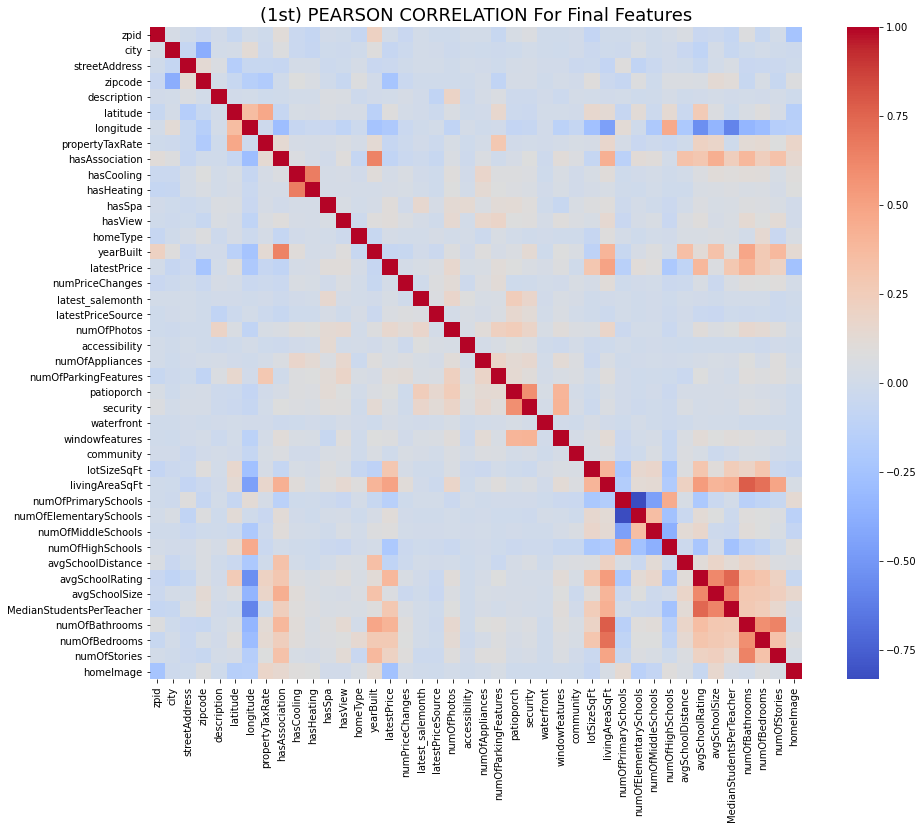

In [14]:
## We'll create new results by passing corr() to our df3.
new_results = df3.corr()
plt.subplots(figsize=(16,12))
plt.title('(1st) PEARSON CORRELATION For Final Features', fontsize=18)
sns.heatmap(new_results, cmap='coolwarm', square=True)
# To save the below plot, uncomment the below code.
# plt.savefig('1stCorrFinal')

In [15]:
## We'll prepare our demonstration input data by isolating our dataframe's top 10 correlated columns
X = df1[final]
X.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,hasAssociation,hasCooling,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,3,3410,78660,992,30.430632,-97.663078,1.98,1,1,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,75
1,120900430,3,971,78660,3489,30.432673,-97.661697,1.98,1,1,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,430
2,2084491383,3,3275,78660,12097,30.409748,-97.639771,1.98,1,1,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,1179
3,120901374,3,340,78660,3503,30.432112,-97.661659,1.98,1,1,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,436
4,60134862,3,3524,78660,5003,30.437368,-97.656860,1.98,1,1,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,10596


In [16]:
## Our output data will simply be our price data.
output = df1['latestPrice']
y = pd.DataFrame(output)
y

,latestPrice
0,305000.0
1,295000.0
2,256125.0
3,240000.0
4,239900.0
...,...
12928,280000.0
12929,330000.0
12930,550000.0
12931,875000.0


In [17]:
## We will standardize our data so that it's easier to identify our most important independent variables for 
## predicting our output (Frost, 2021, 'Identifying the Most Important Independent Variables in Regression Models').
## https://statisticsbyjim.com/regression/identifying-important-independent-variables/
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
scaled_X = data_scaler.fit_transform(X)
scaled_y = data_scaler.fit_transform(y)

In [18]:
## Now we can split our demo data into training and testing data, as we've done in 17.3.1 (2021). 
X_train, X_test, y_train, y_test = train_test_split(scaled_X,
scaled_y, random_state=1)
## Let's look at the dimensions of our training and testing data.

In [19]:
X_train.shape

(9699, 41)

In [20]:
y_train.shape

(9699, 1)

In [21]:
X_test.shape

(3234, 41)

In [22]:
y_test.shape

(3234, 1)

In [23]:
## We see that our testing data has 3,234 samples while our training data has 9,699 samples.
## Compared to the over 12,000 entries of Austin housing data, our testing and training data
## will be easier for our linear regression model to handle.

In [24]:
## Like we've done in 17.2.3 (2021), we'll use the training data to train our 
## Sklearn linear regression model. However, we'll train the model with
## one line of code by applying fit() to LinearRegression() in the same function.
model = LinearRegression().fit(X_train, y_train)

In [25]:
## With our model ready, we'll use it to predict prices using testing data, similar to what
## we've done in 17.3.1 (2021).
y_pred = model.predict(X_test)
y_pred

array([[ 0.02056391],
       [ 0.01613712],
       [-0.19744277],
       ...,
       [ 0.76884434],
       [-0.24755194],
       [-0.3219909 ]])

## Model Performance
Having made predictions on house prices with our model, we can now use several methods mentioned by Adi Brohnstein (2017) to measure our model's performance ("Simple and Multiple Linear Regression in Python"). These methods include calculating R^2, the intercept, and the coefficients for the model's input features.
https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9?gi=4ac15023a176

In [26]:
## We'll store our coefficient values in a transposed dataframe.
coefficients = model.coef_
coeff = pd.DataFrame(coefficients, columns=final)
coeff_T = coeff.transpose()
coeff_sorted = coeff_T.sort_values(by=0, ascending=False)
coeff_sorted.head()

,0
livingAreaSqFt,0.586469
avgSchoolRating,0.307090
numOfBathrooms,0.168652
longitude,0.119575
numOfElementarySchools,0.085426


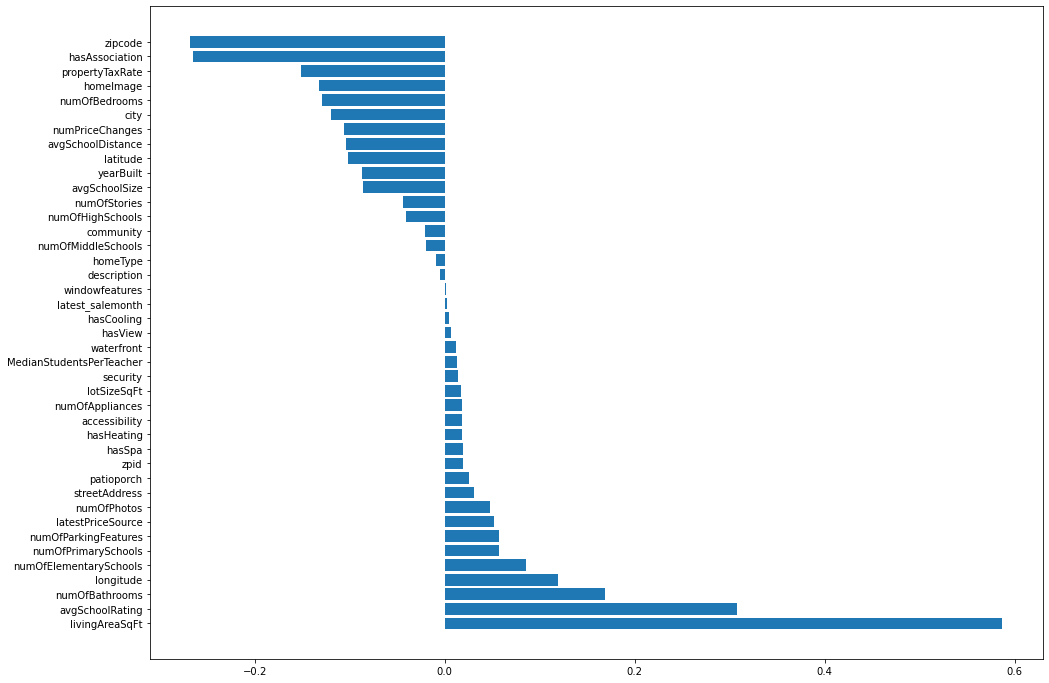

In [27]:
## We'll visualize the degree of the coefficients for our price-predicting model.
names = coeff_sorted.index
values = coeff_sorted[0]
plt.subplots(figsize=(16,12))
plt.barh(names, values)
# To save the below plot, uncomment the below code.
plt.savefig('1stCoeff.png')

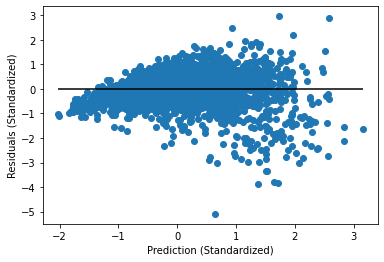

In [28]:
## As seen in classwork code for multilinear regression (2021), we can represent the difference between our model's
## predicted values and the actual test output values on a residual plot. The smaller the difference is,
## the closer the predictions are to the actual value, and ultimately the more accurate our model would be.
plt.scatter(y_pred, y_pred - y_test)
plt.xlabel('Prediction (Standardized)')
plt.ylabel('Residuals (Standardized)')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='black')
# To save the below plot, uncomment the below code.
# plt.savefig('chk1.png')
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = "{:.5f}".format(model.score(X_test, y_test))
intercept = model.intercept_
## We are looking to measure mean squared error (MSE) as one way to gauge our regression 
## model's accuracy, as suggested here: https://stats.stackexchange.com/questions/142873/how-to-determine-the-accuracy-of-regression-which-measure-should-be-used
## A quick way to calculate MSE is with sklearn metrics, as seen here:
## https://www.pythonpool.com/mean-squared-error-python/
MSE = "{:.5f}".format(mean_squared_error(y_test, y_pred))

## From the MSE, we can calculate root MSE by setting the squared parameter to 'false'.
RootMSE = "{:.5f}".format(mean_squared_error(y_test, y_pred, squared=False))

## Another metric we can calculate is mean absolute error (MAE)
MAE = "{:.5f}".format(mean_absolute_error(y_test, y_pred))

print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RootMSE}")
print(f"Mean Absolute Error : {MAE}")
print(f"R^2 Score: {score}")
print(f"Model Intecept: {intercept}")

Mean Squared Error: 0.40015
Root Mean Squared Error: 0.63257
Mean Absolute Error : 0.44523
R^2 Score: 0.59099
Model Intecept: [-0.00025809]
